In [1]:
# Load all dictionaries
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon



### Move to the directory where you have the data

In [2]:
## in the local
os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\Shuffle')

##Load shuffle neuron by neuron
shuffle_conditions = np.load('Shuffle_each_conditions.npy', encoding = 'latin1')
shuffle_conditions= shuffle_conditions[0]

shuffle_conditions_d = np.load('Shuffle_each_conditions_d.npy', encoding = 'latin1')
shuffle_conditions_d= shuffle_conditions_d[0]

os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons')

### Load data
cd_LIP_hm = np.load('cd_LIP_hm.npy')
cd_DLPFC_hm = np.load('cd_DLPFC_hm.npy')
cd_LIP = np.load('cd_LIP.npy')
cd_DLPFC = np.load('cd_DLPFC.npy')

cd_LIP_d_hm = np.load('cd_LIP_d_hm.npy')
cd_DLPFC_d_hm = np.load('cd_DLPFC_d_hm.npy')
cd_LIP_d = np.load('cd_LIP_d.npy')
cd_DLPFC_d = np.load('cd_DLPFC_d.npy')

In [7]:
np.shape(shuffle_conditions)

(285, 176)

In [8]:
## if I am in the cluster
#os.chdir('/home/david/Desktop/IDIBAPS/Gottlib')

In [9]:
time_br =19 ## last 200ms

## Target Decoding

(4, 22, 22, 44)
conditions, train, test, neuron_error
(4, 22, 22)
conditions, train, test value (mean error of all the neurons)


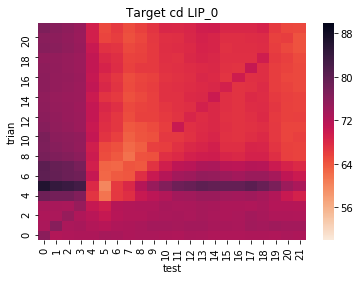

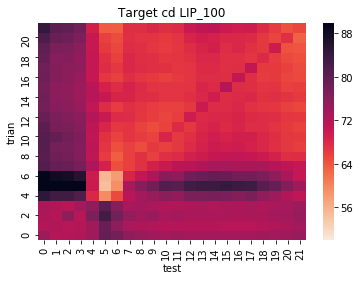

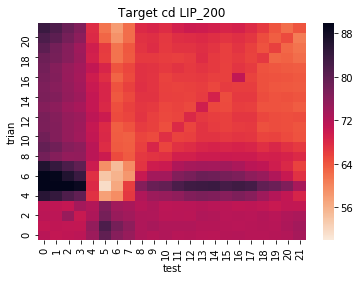

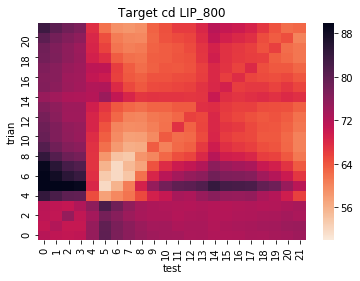

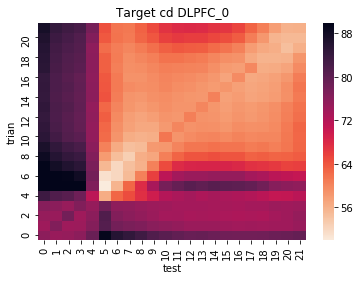

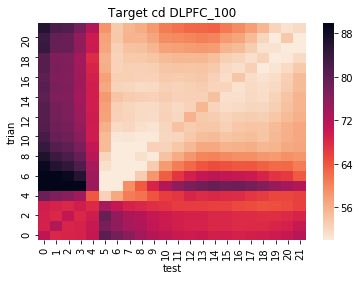

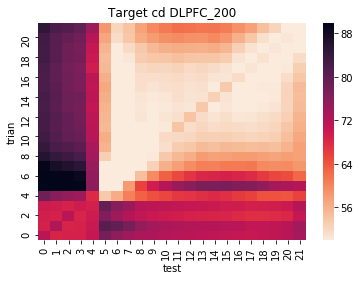

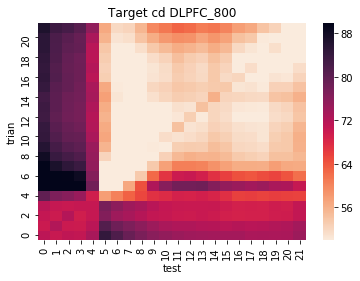

In [10]:



#### Error of each neuron for each cross-decoding condition
print(np.shape(cd_LIP))
print('conditions, train, test, neuron_error')

#### Each "square" has 44 or 63 values (1 per neuron). For the heatmap, I get the mean of all the neurons in each cross-decoding condition

print(np.shape(cd_LIP_hm))
print('conditions, train, test value (mean error of all the neurons)')

### Heatmaps
Conditions_titles_lip = ['LIP_0', 'LIP_100', 'LIP_200', 'LIP_800']
Conditions_titles_dlpfc = ['DLPFC_0', 'DLPFC_100', 'DLPFC_200', 'DLPFC_800']

#sns.cm.rocket_r
for Cond in range(0,4):
    ax = sns.heatmap(cd_LIP_hm[Cond],vmin=50, vmax=90, cmap= sns.cm.rocket_r )
    ax.invert_yaxis()
    plt.xlabel('test')
    plt.ylabel('trian')
    plt.title('Target cd ' + Conditions_titles_lip[Cond])
    plt.show()

for Cond in range(0,4):
    ax = sns.heatmap(cd_DLPFC_hm[Cond],vmin=50, vmax=90, cmap= sns.cm.rocket_r )
    ax.invert_yaxis()
    plt.xlabel('test')
    plt.ylabel('trian')
    plt.title('Target cd ' + Conditions_titles_dlpfc[Cond])
    plt.show()

### Reshape shuffle

In [11]:
#### Subtract shuffle neuron by neuron!!!

## Amount of neuorn in first 4 and 2nd 4 conditions (IPS, DLPFC)
sh_cond=1
time=100 ## 22*8
amount_neurons = np.unique([np.shape(shuffle_conditions[sh_cond, time])[0] for time in range(0, 176)])
print(amount_neurons)



#### For each condition I have the (285, 22) matrix of each neuron
ns_IPS_0={}
ns_IPS_100={}
ns_IPS_200={}
ns_IPS_800={}
ns_DLPFC_0={}
ns_DLPFC_100={}
ns_DLPFC_200={}
ns_DLPFC_800={}

conditions_dictionaries= [ns_IPS_0, ns_IPS_100,ns_IPS_200, ns_IPS_800, ns_DLPFC_0, ns_DLPFC_100, ns_DLPFC_200, ns_DLPFC_800]
neurons_cons = [44, 44, 44, 44, 63, 63, 63, 63]
start_conditions = list(np.arange(0, 176, 22))
end_conditions = list(np.array(start_conditions) + 22 )

for Condition in range(0,8):
    start=start_conditions[Condition]
    end = end_conditions[Condition]
    n_neurons= neurons_cons[Condition]
    for neuron in range(0, n_neurons):
        times=[]
        for t in range(start,end):
            times.append(pd.DataFrame([shuffle_conditions[i, t][neuron] for i in range(0, 285)]))

        n_t = pd.concat(times, axis=1)
        n_t.columns = [str(i) for i in range(0,22)]
        conditions_dictionaries[Condition][str(neuron)] = n_t


        
        
conditions_dictionaries[6].keys()

[44 63]


dict_keys(['16', '39', '42', '22', '27', '54', '57', '41', '34', '28', '60', '32', '10', '46', '30', '15', '26', '7', '50', '48', '31', '61', '36', '19', '33', '43', '2', '12', '13', '62', '1', '29', '9', '45', '25', '37', '24', '40', '51', '0', '5', '23', '17', '14', '44', '53', '49', '59', '38', '8', '56', '11', '18', '47', '58', '35', '21', '4', '20', '6', '52', '3', '55'])

## LIP Train all times and test end delay

#### ¿Como decodifico el target en el response time cuendo entreno en X ?

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


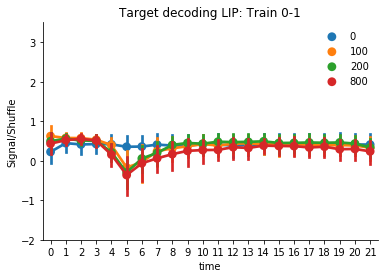

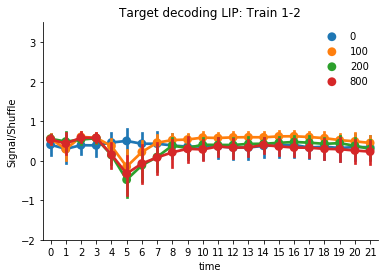

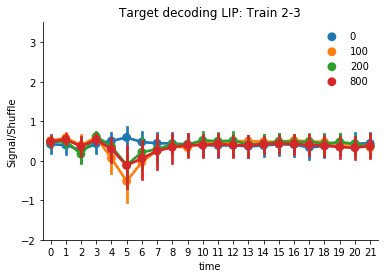

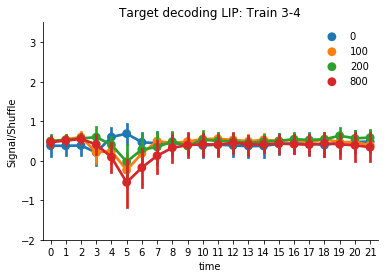

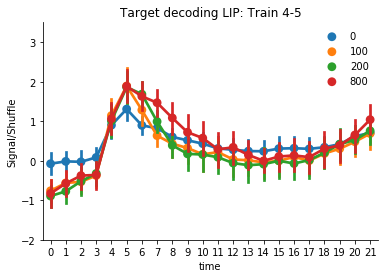

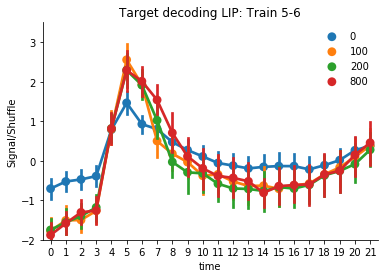

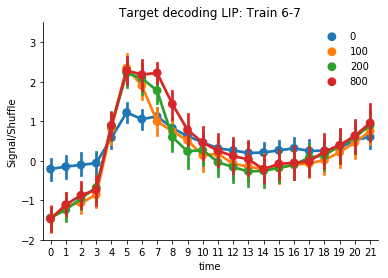

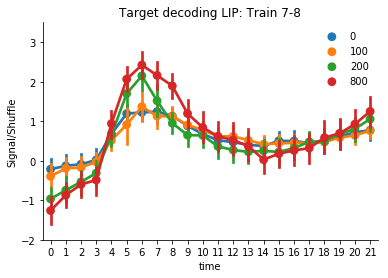

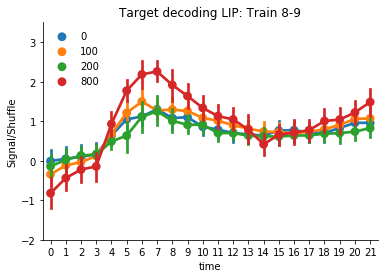

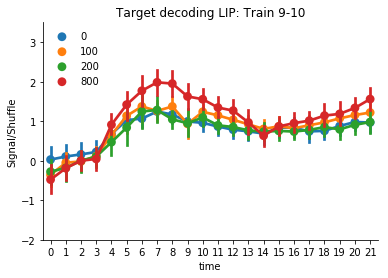

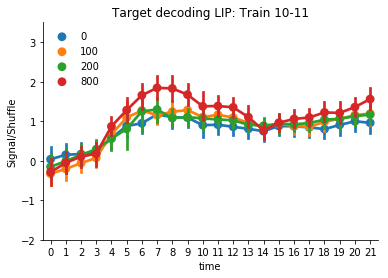

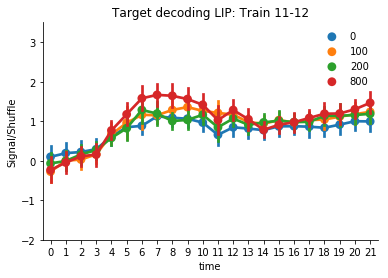

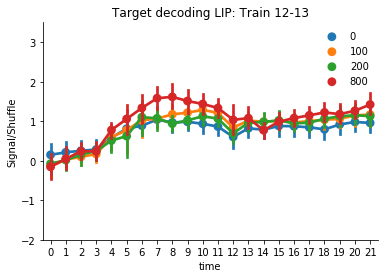

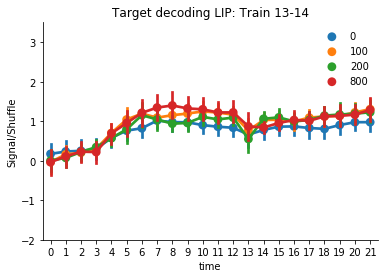

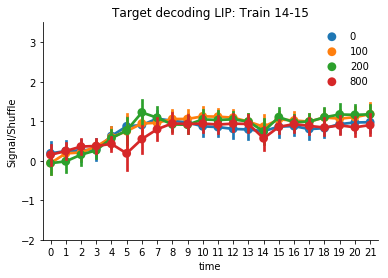

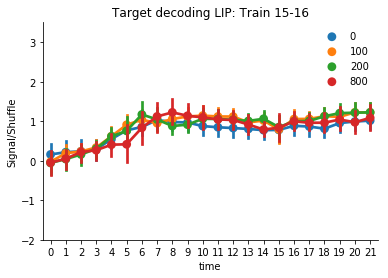

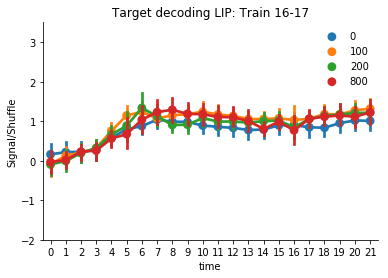

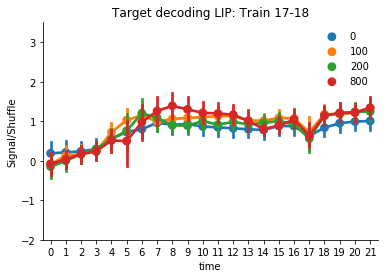

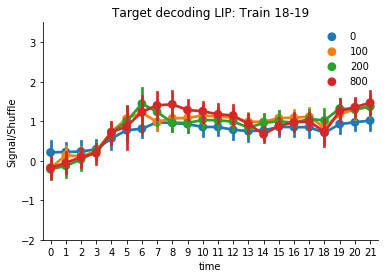

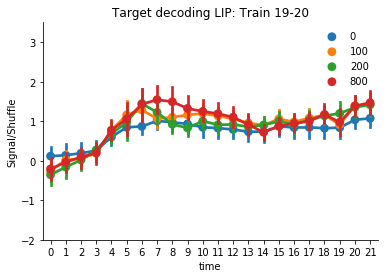

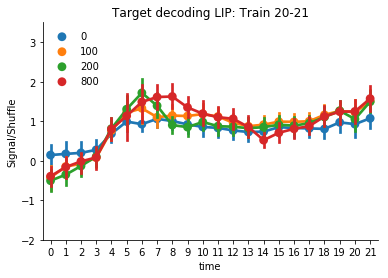

No handles with labels found to put in legend.


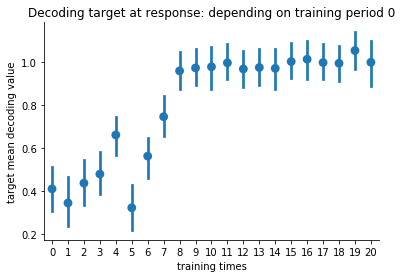

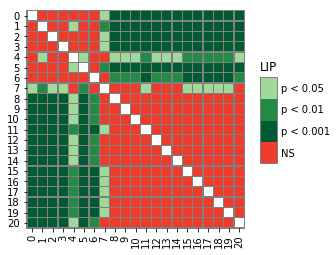

No handles with labels found to put in legend.


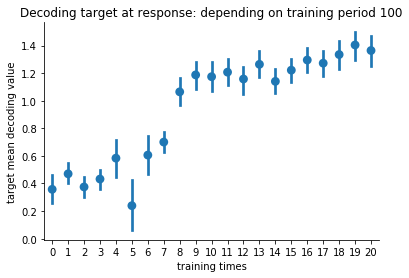

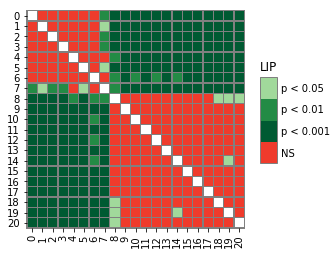

No handles with labels found to put in legend.


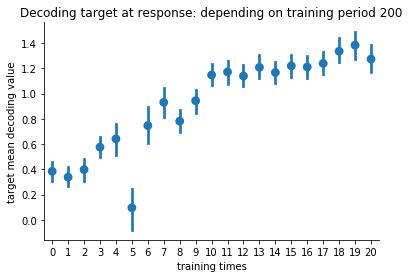

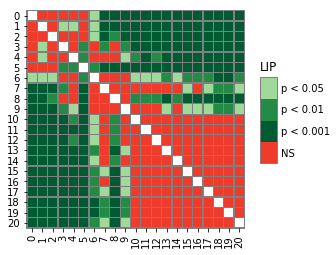

No handles with labels found to put in legend.


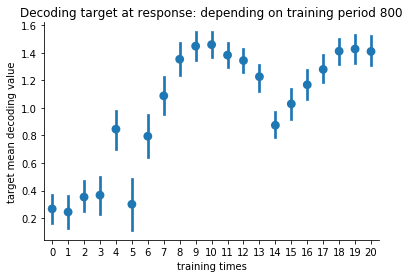

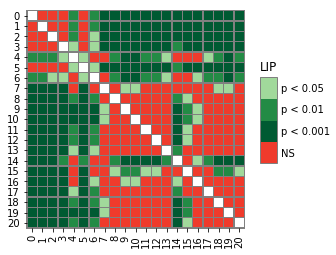

In [12]:

i_t = list(range(0, 21))
f_t = list(range(1, 22))
titles = [str(i_t[i]) for i in range(0, len(i_t))]
frames_fd=[]

#### All times (training in distractor presentation, test on the rest)

for win in range(0,len(i_t)):
    frames_lip=[]

    for idx, cond in enumerate([0,100,200,800]): #,100,200,800
        ns={}
        for i in range(i_t[win], f_t[win]):
            ns[str(i)]=pd.DataFrame(cd_LIP[idx, i, : ]).transpose() 

        N=pd.Panel(ns)
        n=N.mean(axis=0)
        neurons_sh = []
        for neuron in range(0, 44):
            sh_cond_n = conditions_dictionaries[idx][str(neuron)].mean(axis=0)
            sh_cond_n_std = conditions_dictionaries[idx][str(neuron)].std(axis=0)
            subst = (np.array(n.iloc[neuron]) - np.array(sh_cond_n))/ np.array(sh_cond_n_std)
            subst = -1*subst 
            neurons_sh.append(subst)

        n = pd.DataFrame(neurons_sh)
        n.columns=[x for x in range(0, 22)]
        n = pd.melt(n)
        n['cond'] = cond
        n['area'] ='LIP'
        frames_lip.append(n)

    lip_dist=pd.concat(frames_lip)
    sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
    plt.legend(frameon=False)
    plt.title('Target decoding LIP: Train ' + str(i_t[win]) + '-' + str(f_t[win]) )
    plt.xlabel('time')
    plt.ylabel('Signal/Shuffle')
    plt.ylim(-2, 3.5)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.show()
    
    #
    f_d = pd.DataFrame(lip_dist.loc[lip_dist['variable']>time_br, ['value', 'cond']])
    f_d['tr_time'] =  i_t[win]
    f_d
    frames_fd.append(f_d)

    

frames_fd = pd.concat(frames_fd, ignore_index=True)

##Plot
for Cond in [0,100,200,800]:
    sns.pointplot(x='tr_time', y='value', ci=69, join=False, x_estimator=np.mean, data=frames_fd.loc[frames_fd['cond']==Cond])
    plt.legend(frameon=False)
    plt.title('Decoding target at response: depending on training period ' + str(Cond))
    plt.xlabel('training times')
    plt.ylabel('target mean decoding value')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.show()
    ####
    pc = sp.posthoc_ttest(frames_fd.loc[frames_fd['cond']==Cond], val_col='value', group_col='tr_time') 
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
    sp.sign_plot(pc, **heatmap_args)
    plt.title('LIP')
    plt.show()
    

## DLPFC Train all times and test end delay

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


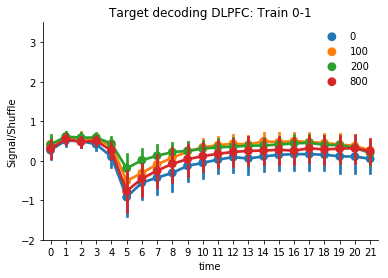

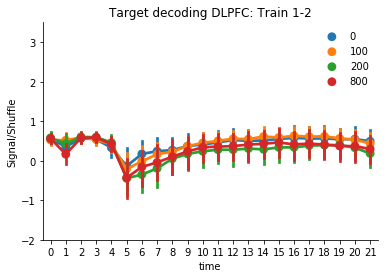

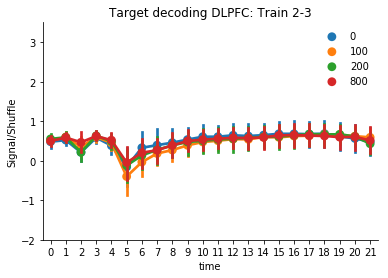

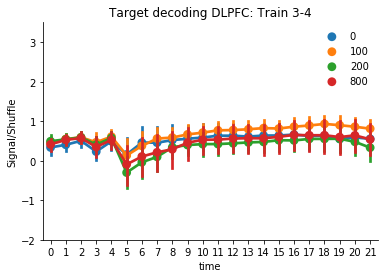

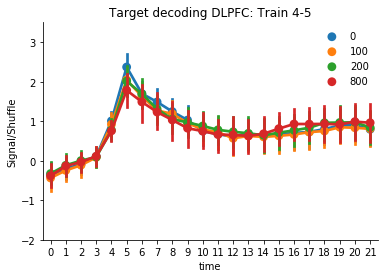

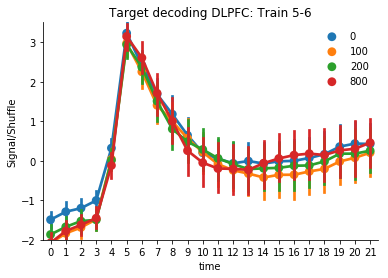

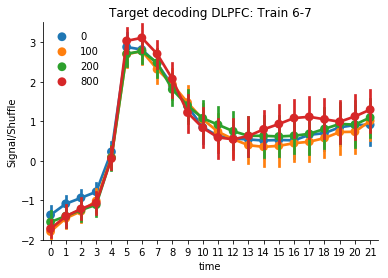

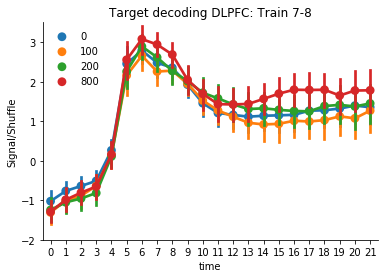

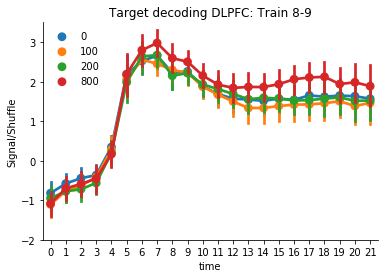

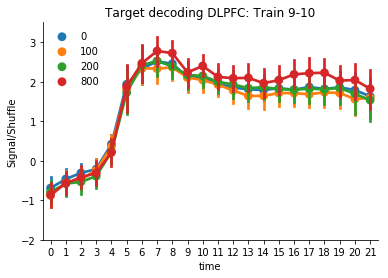

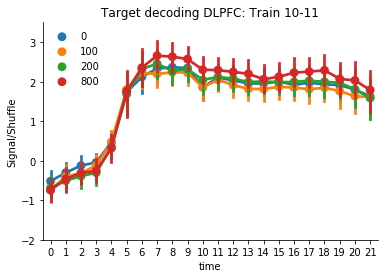

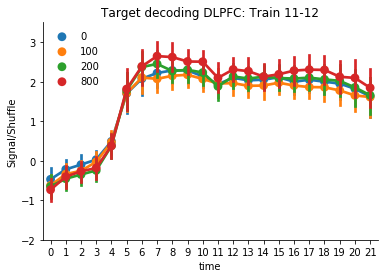

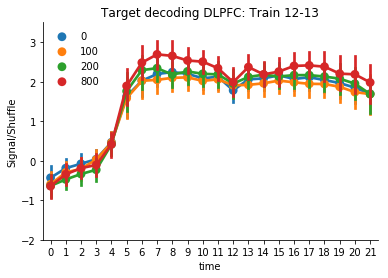

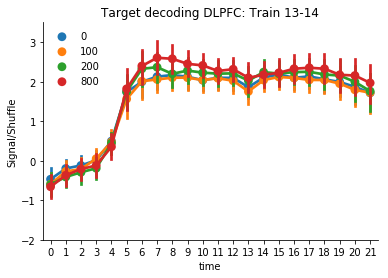

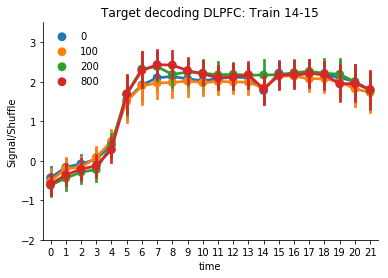

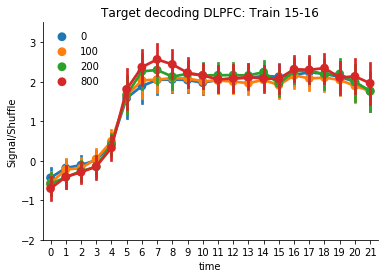

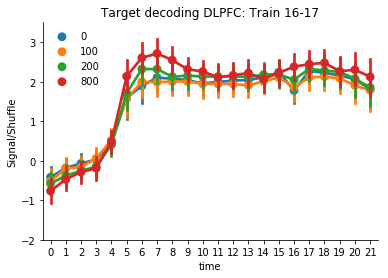

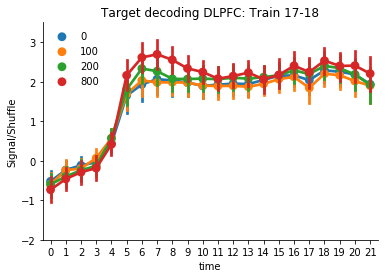

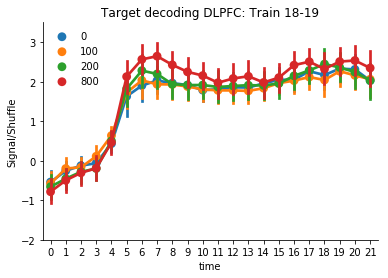

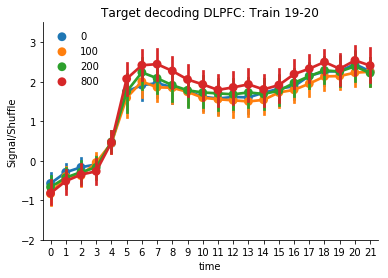

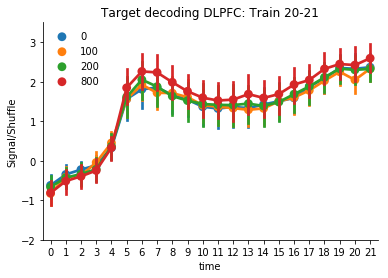

No handles with labels found to put in legend.


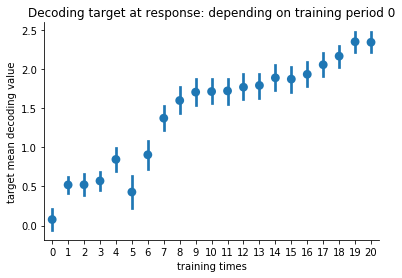

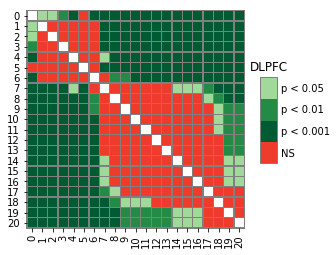

No handles with labels found to put in legend.


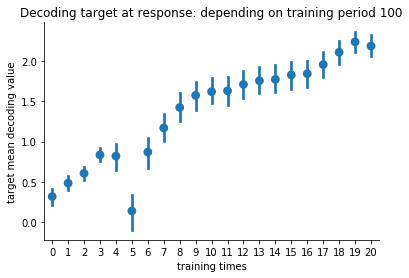

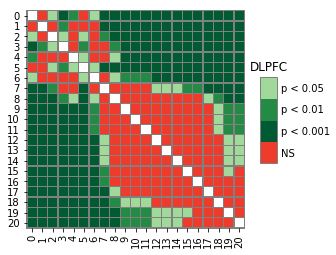

No handles with labels found to put in legend.


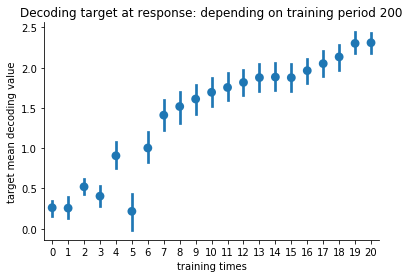

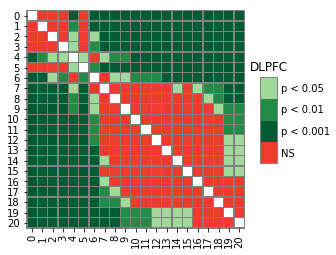

No handles with labels found to put in legend.


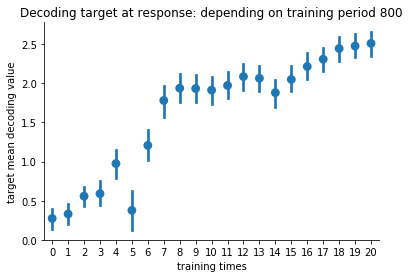

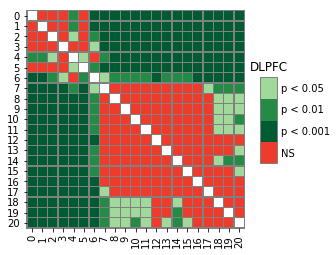

In [24]:

i_t = list(range(0, 21))
f_t = list(range(1, 22))
titles = [str(i_t[i]) for i in range(0, len(i_t))]
frames_fd=[]

#### All times (training in distractor presentation, test on the rest)

for win in range(0,len(i_t)):
    frames_dlpfc=[]

    for idx, cond in enumerate([0,100,200,800]): # ,100,200,800
        ns={}
        for i in range(i_t[win], f_t[win]):
            ns[str(i)]=pd.DataFrame(cd_DLPFC[idx, i, : ]).transpose() 

        N=pd.Panel(ns)
        n=N.mean(axis=0)
        neurons_sh = []
        for neuron in range(0, 63):
            sh_cond_n = conditions_dictionaries[4+idx][str(neuron)].mean(axis=0)
            sh_cond_n_std = conditions_dictionaries[4+idx][str(neuron)].std(axis=0)
            subst = (np.array(n.iloc[neuron]) - np.array(sh_cond_n))/ np.array(sh_cond_n_std)
            subst = -1*subst 
            neurons_sh.append(subst)

        n = pd.DataFrame(neurons_sh)
        n.columns=[x for x in range(0, 22)]
        n = pd.melt(n)
        n['cond'] = cond
        n['area'] ='DLPFC'
        frames_dlpfc.append(n)

    dlpfc_dist=pd.concat(frames_dlpfc)
    sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
    plt.legend(frameon=False)
    plt.title('Target decoding DLPFC: Train ' + str(i_t[win]) + '-' + str(f_t[win]) )
    plt.xlabel('time')
    plt.ylabel('Signal/Shuffle')
    plt.ylim(-2, 3.5)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.show()
    
    #
    f_d = pd.DataFrame(dlpfc_dist.loc[dlpfc_dist['variable']>time_br,  ['value', 'cond']])
    f_d['tr_time'] =  i_t[win]
    f_d
    frames_fd.append(f_d)

    

frames_fd = pd.concat(frames_fd, ignore_index=True)


##Plot
for Cond in [0,100,200,800]:
    sns.pointplot(x='tr_time', y='value', ci=69, join=False, x_estimator=np.mean, data=frames_fd.loc[frames_fd['cond']==Cond])
    plt.legend(frameon=False)
    plt.title('Decoding target at response: depending on training period ' + str(Cond))
    plt.xlabel('training times')
    plt.ylabel('target mean decoding value')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.show()
    ####
    pc = sp.posthoc_ttest(frames_fd.loc[frames_fd['cond']==Cond], val_col='value', group_col='tr_time') 
    #print(pc)
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
    sp.sign_plot(pc, **heatmap_args)
    plt.title('DLPFC')
    plt.show()

    

In [13]:
np.shape(frames_fd)

(7392, 3)

### Train Distractor

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


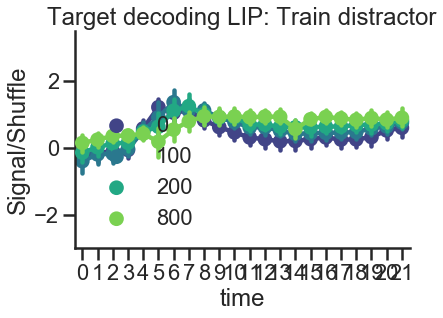

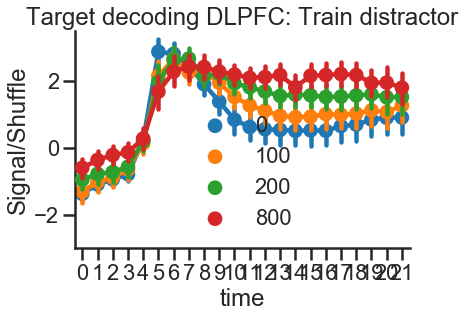

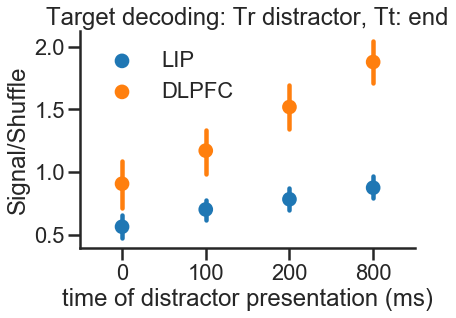

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     18.86
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           7.51e-12
Time:                        16:46:44   Log-Likelihood:                -1614.7
No. Observations:                 856   AIC:                             3237.
Df Residuals:                     852   BIC:                             3256.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0713      0.095  

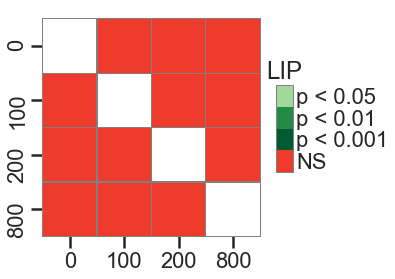

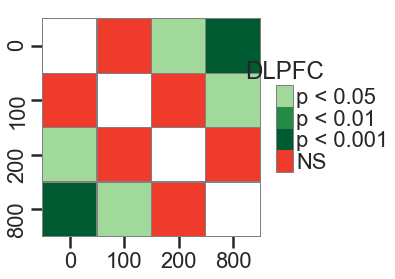

In [51]:
distractor_times=[6,7,8,14]

frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_LIP[idx, distractor_times[idx], : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 44):
        sh_cond_n = conditions_dictionaries[idx][str(neuron)].mean(axis=0)
        sh_cond_n_std = conditions_dictionaries[idx][str(neuron)].std(axis=0)
        subst = (np.array(n.iloc[neuron]) - np.array(sh_cond_n))/ np.array(sh_cond_n_std)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist, palette='viridis')
plt.legend(frameon=False)
plt.title('Target decoding LIP: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.ylim(-3, 3.5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_DLPFC[idx, distractor_times[idx], : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 63):
        sh_cond_n = conditions_dictionaries[4+idx][str(neuron)].mean(axis=0)
        sh_cond_n_std = conditions_dictionaries[4+idx][str(neuron)].std(axis=0)
        subst = (np.array(n.iloc[neuron]) - np.array(sh_cond_n))/ np.array(sh_cond_n_std)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    n['cond'] = cond
    n['area'] ='DLPFC'
    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Target decoding DLPFC: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.ylim(-3, 3.5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

#######

cond=[0, 100, 200, 800]
frames=[ ]
for i in range(0,len(cond)):
    ##LIP
    int_values_lip = lip_dist.loc[(lip_dist['variable'] > time_br ) & (lip_dist['cond'] == cond[i])]
    frames.append(int_values_lip)
    ##DLPFC
    int_values_dlpfc = dlpfc_dist.loc[(dlpfc_dist['variable'] > time_br) & (dlpfc_dist['cond'] == cond[i])]
    frames.append(int_values_dlpfc)


decoding = pd.concat(frames, ignore_index=True)


##Plot
sns.pointplot(x='cond', y='value', hue='area', ci=69, join=False, x_estimator=np.mean, data=decoding)
plt.legend(frameon=False)
plt.title('Target decoding: Tr distractor, Tt: end')
plt.xlabel('time of distractor presentation (ms)')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


model = smf.ols(formula="value ~  cond*area", data=decoding).fit()
print(model.summary())


####### Multiple comparisons
pc = sp.posthoc_ttest(decoding.loc[decoding['area']=='LIP'], val_col='value', group_col='cond', p_adjust = 'fdr_bh') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('LIP')
plt.show()

pc = sp.posthoc_ttest(decoding.loc[decoding['area']=='DLPFC'], val_col='value', group_col='cond', p_adjust = 'fdr_bh') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('DLPFC')
plt.show()

In [66]:
def adjust_spines(ax, spines):  ### aesthetics, offset axies 
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 20))  # outward by 10 points
            ### spine.set_smart_bounds(True) ##comment if you want to be free to set the ylims by your own
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


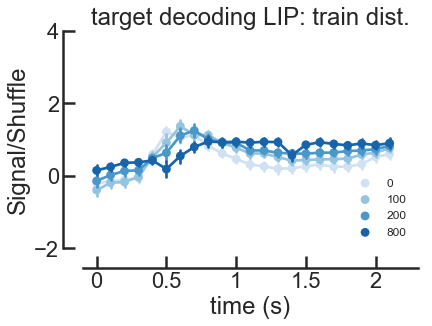

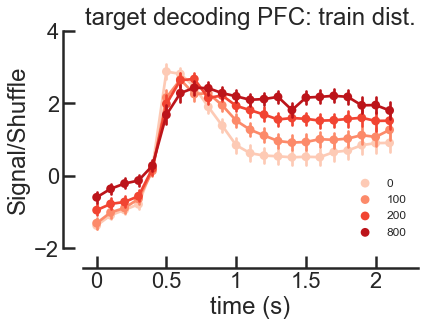

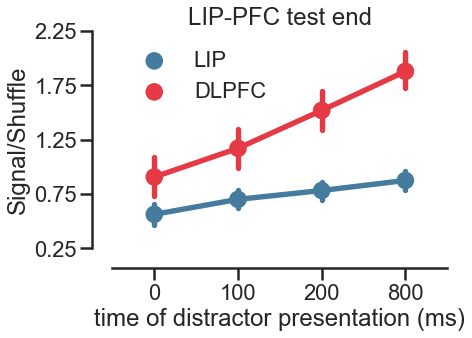

In [104]:
sns.set_style("ticks")
paper_rc = {'lines.linewidth': 1.5, 'lines.markersize': 7}                  
sns.set_context("poster", rc = paper_rc)  


# lip 
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist, ci=69,  
              linewidth=2, estimator=np.mean, palette='Blues')
plt.legend(frameon=False, loc=4, prop={'size': 12})
plt.title('target decoding LIP: train dist.' )
plt.xlabel('time (s)')
plt.ylabel('Signal/Shuffle')
plt.ylim(-2, 4)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticks([0,5,10,15,20])
plt.gca().set_xticklabels([0,0.5,1,1.5,2])
plt.gca().set_xlim(-1,23)
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.show()


### pfc


sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist, ci=69,  
              linewidth=2, estimator=np.mean, palette='Reds')
plt.legend(frameon=False, loc=4, prop={'size': 12})
plt.title('target decoding PFC: train dist.' )
plt.xlabel('time (s)')
plt.ylabel('Signal/Shuffle')
plt.ylim(-2, 4)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticks([0,5,10,15,20])
plt.gca().set_xticklabels([0,0.5,1,1.5,2])
plt.gca().set_xlim(-1,23)
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.show()


######
paper_rc = {'lines.linewidth': 3., 'lines.markersize': 8.}                  
sns.set_context("poster", rc = paper_rc)  

sns.pointplot(x='cond', y='value', hue='area', ci=69, join=True, x_estimator=np.mean, 
              data=decoding, palette=['#457b9d', '#e63946']) ##e63946
plt.legend(frameon=False)
plt.title('LIP-PFC test end' )
plt.xlabel('time of distractor presentation (ms)')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylim(0.25, 2.25)
plt.yticks([0.25, 0.75, 1.25, 1.75, 2.25])
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


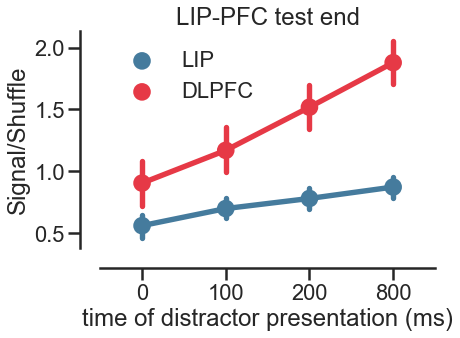

In [113]:
######
paper_rc = {'lines.linewidth': 3., 'lines.markersize': 8.}                  
sns.set_context("poster", rc = paper_rc)  

sns.pointplot(x='cond', y='value', hue='area', ci=69, join=True, x_estimator=np.median, 
              data=decoding, palette=['#457b9d', '#e63946']) ##e63946
plt.legend(frameon=False)
plt.title('LIP-PFC test end' )
plt.xlabel('time of distractor presentation (ms)')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
#plt.ylim(0.25, 2.25)
#plt.xlim(3.5,-0.5)
#plt.yticks([0.25, 0.75, 1.25, 1.75, 2.25])
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.show()

In [ ]:
### substract max mean decoding. From substracted, center to mean

In [144]:
max_m_lip = decoding.loc[(decoding['area']=='LIP') & (decoding['cond']==800), 'value'].mean()
max_m_pfc = decoding.loc[(decoding['area']=='DLPFC') & (decoding['cond']==800), 'value'].mean()

val_m=[]
for i in range(0, len(decoding)):
    if decoding['area'].iloc[i]=='LIP':
        val_m.append(  decoding['value'].iloc[i] - max_m_lip )
    elif decoding['area'].iloc[i]=='DLPFC':
        val_m.append( decoding['value'].iloc[i] - max_m_pfc )
##
decoding['val_m']=[abs(val_m[i]) for i in range(0, len(decoding))]

max_m_lip_0 = decoding.loc[(decoding['area']=='LIP') & (decoding['cond']==800), 'val_m'].mean()
max_m_pfc_0 = decoding.loc[(decoding['area']=='DLPFC') & (decoding['cond']==800), 'val_m'].mean()


###
val_m_0=[]
for i in range(0, len(decoding)):
    if decoding['area'].iloc[i]=='LIP':
        val_m_0.append(  decoding['val_m'].iloc[i] - max_m_lip_0 )
    elif decoding['area'].iloc[i]=='DLPFC':
        val_m_0.append( decoding['val_m'].iloc[i] - max_m_pfc_0 )

decoding['val_m0']=[val_m_0[i] for i in range(0, len(decoding))]
        
        

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


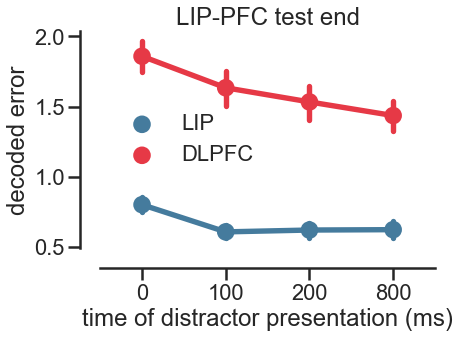

In [153]:
# sns.pointplot(x='cond', y='val_m', hue='area', ci=69, join=True, x_estimator=np.median, 
#               data=decoding, palette=['#457b9d', '#e63946']) ##e63946
# plt.legend(frameon=False)
# plt.title('LIP-PFC test end' )
# plt.xlabel('time of distractor presentation (ms)')
# plt.ylabel('decoded error')
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().get_xaxis().tick_bottom()
# plt.gca().get_yaxis().tick_left()
# adjust_spines(plt.gca(), ['left', 'bottom'])
# plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


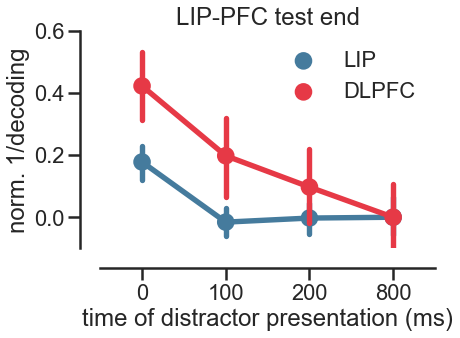

In [158]:
sns.pointplot(x='cond', y='val_m0', hue='area', ci=69, join=True, x_estimator=np.median, 
              data=decoding, palette=['#457b9d', '#e63946']) ##e63946
plt.legend(frameon=False)
plt.title('LIP-PFC test end' )
plt.xlabel('time of distractor presentation (ms)')
plt.ylabel('norm. 1/decoding')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylim(-0.1, 0.6)
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.show()

## Distractor Decoding

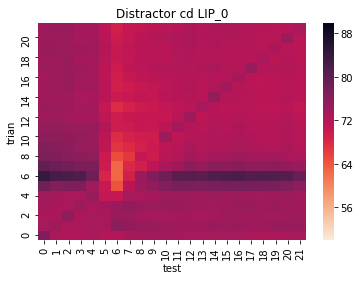

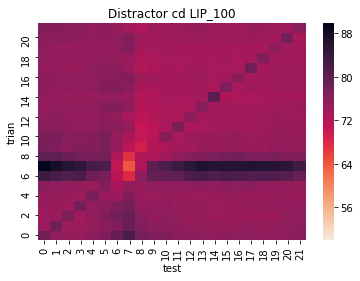

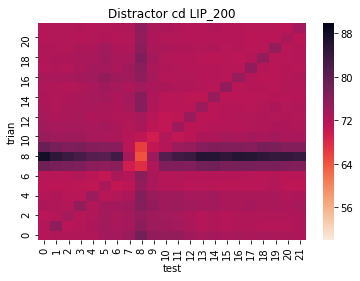

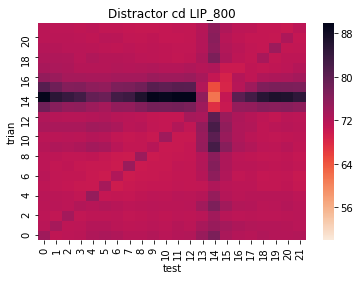

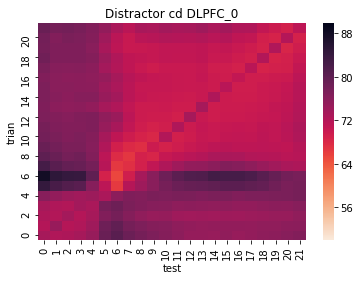

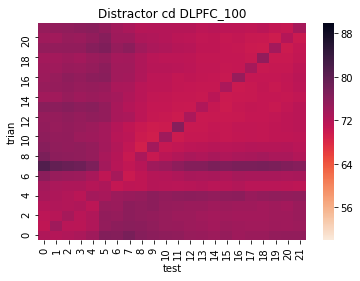

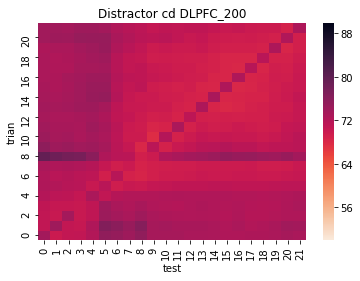

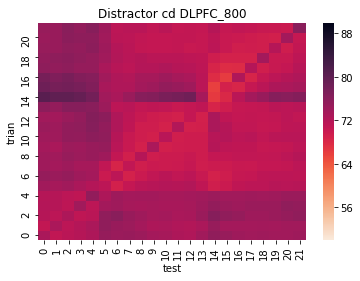

In [119]:
Conditions_titles_lip = ['LIP_0', 'LIP_100', 'LIP_200', 'LIP_800']
Conditions_titles_dlpfc = ['DLPFC_0', 'DLPFC_100', 'DLPFC_200', 'DLPFC_800']

#sns.cm.rocket_r
for Cond in range(0,4):
    ax = sns.heatmap(cd_LIP_d_hm[Cond],vmin=50, vmax=90, cmap= sns.cm.rocket_r )
    ax.invert_yaxis()
    plt.xlabel('test')
    plt.ylabel('trian')
    plt.title('Distractor cd ' + Conditions_titles_lip[Cond])
    plt.show()

for Cond in range(0,4):
    ax = sns.heatmap(cd_DLPFC_d_hm[Cond],vmin=50, vmax=90, cmap= sns.cm.rocket_r )
    ax.invert_yaxis()
    plt.xlabel('test')
    plt.ylabel('trian')
    plt.title('Distractor cd ' + Conditions_titles_dlpfc[Cond])
    plt.show()

### Reshape shuffle

In [120]:
#### Subtract shuffle neuron by neuron!!!

## Amount of neuorn in first 4 and 2nd 4 conditions (IPS, DLPFC)
sh_cond=1
time=100 ## 22*8
amount_neurons = np.unique([np.shape(shuffle_conditions_d[sh_cond, time])[0] for time in range(0, 176)])
print(amount_neurons)



#### For each condition I have the (285, 22) matrix of each neuron
ns_IPS_0={}
ns_IPS_100={}
ns_IPS_200={}
ns_IPS_800={}
ns_DLPFC_0={}
ns_DLPFC_100={}
ns_DLPFC_200={}
ns_DLPFC_800={}

conditions_dictionaries_d= [ns_IPS_0, ns_IPS_100,ns_IPS_200, ns_IPS_800, ns_DLPFC_0, ns_DLPFC_100, ns_DLPFC_200, ns_DLPFC_800]
neurons_cons = [44, 44, 44, 44, 63, 63, 63, 63]
start_conditions = list(np.arange(0, 176, 22))
end_conditions = list(np.array(start_conditions) + 22 )

for Condition in range(0,8):
    start=start_conditions[Condition]
    end = end_conditions[Condition]
    n_neurons= neurons_cons[Condition]
    for neuron in range(0, n_neurons):
        times=[]
        for t in range(start,end):
            times.append(pd.DataFrame([shuffle_conditions_d[i, t][neuron] for i in range(0, 285)]))

        n_t = pd.concat(times, axis=1)
        n_t.columns = [str(i) for i in range(0,22)]
        conditions_dictionaries_d[Condition][str(neuron)] = n_t


        
        
conditions_dictionaries_d[6].keys()

[44 63]


dict_keys(['27', '36', '60', '13', '22', '18', '4', '28', '52', '46', '55', '14', '21', '54', '29', '6', '12', '56', '44', '34', '42', '10', '17', '1', '20', '57', '26', '59', '50', '49', '33', '48', '35', '45', '3', '24', '7', '32', '53', '62', '61', '15', '51', '2', '23', '30', '43', '0', '25', '5', '19', '8', '41', '40', '39', '37', '11', '9', '38', '47', '58', '16', '31'])

## LIP Train all times and test end delay

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


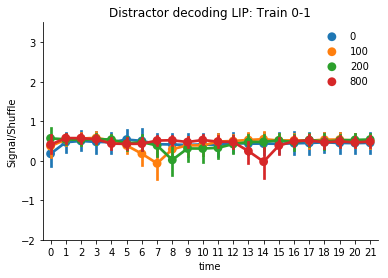

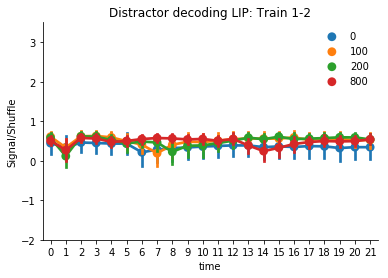

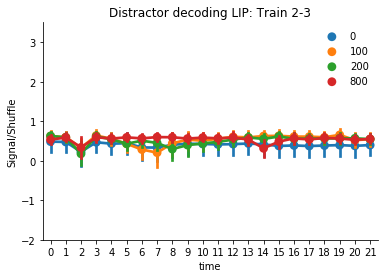

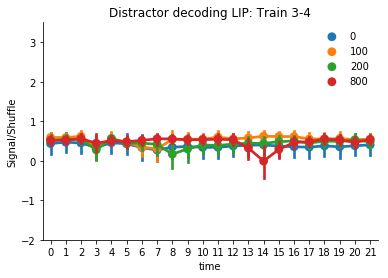

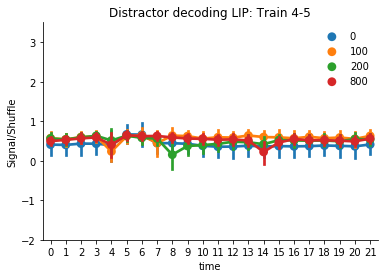

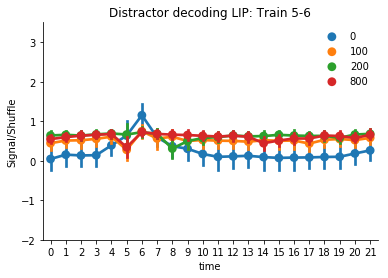

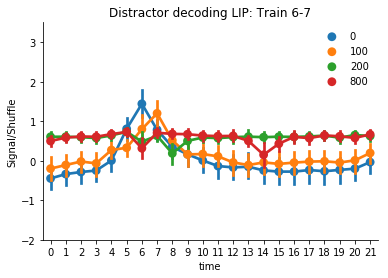

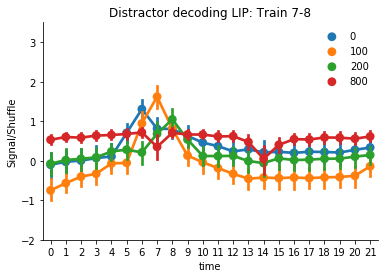

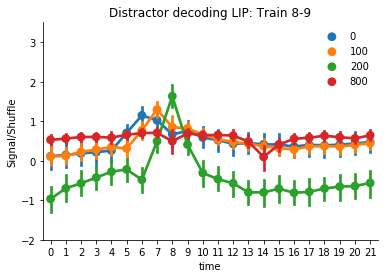

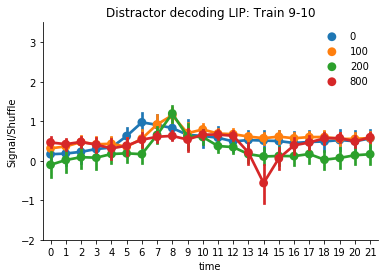

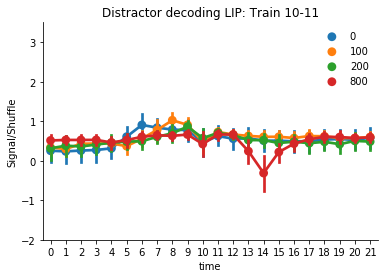

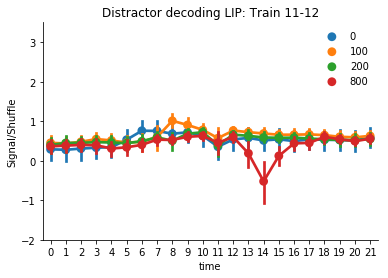

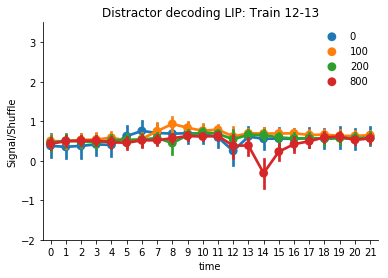

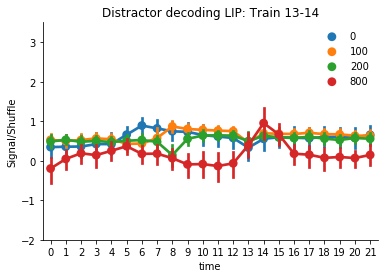

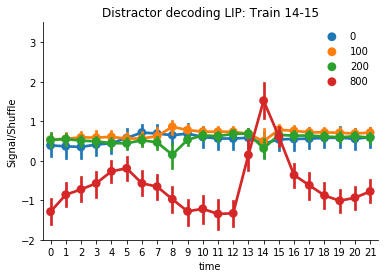

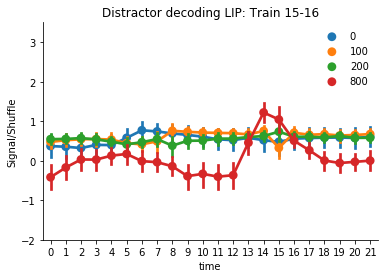

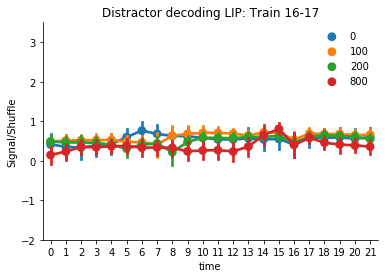

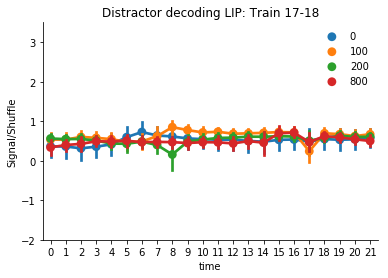

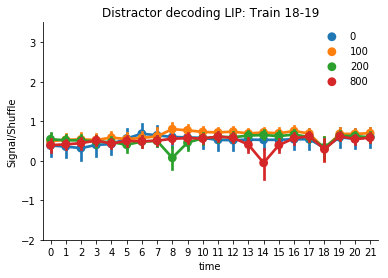

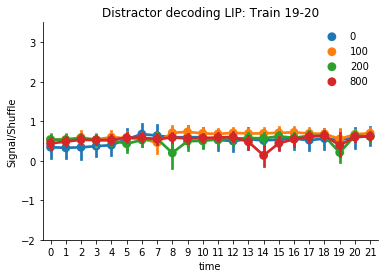

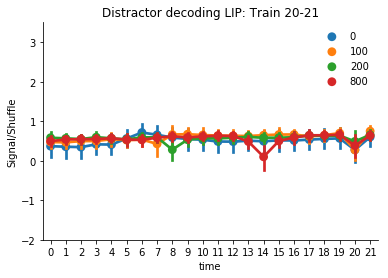

No handles with labels found to put in legend.


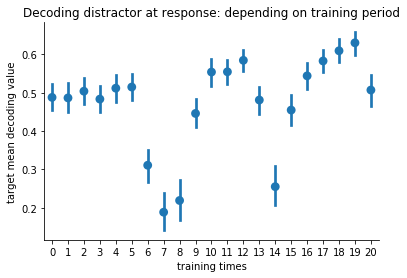

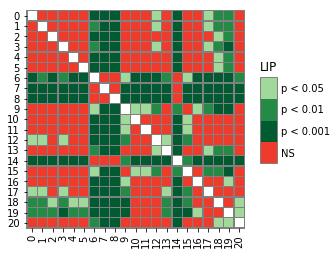

In [121]:

i_t = list(range(0, 21))
f_t = list(range(1, 22))
titles = [str(i_t[i]) for i in range(0, len(i_t))]
frames_fd=[]

#### All times (training in distractor presentation, test on the rest)

for win in range(0,len(i_t)):
    frames_lip=[]

    for idx, cond in enumerate([0,100,200,800]):
        ns={}
        for i in range(i_t[win], f_t[win]):
            ns[str(i)]=pd.DataFrame(cd_LIP_d[idx, i, : ]).transpose() 

        N=pd.Panel(ns)
        n=N.mean(axis=0)
        neurons_sh = []
        for neuron in range(0, 44):
            sh_cond_n = conditions_dictionaries_d[idx][str(neuron)].mean(axis=0)
            sh_cond_n_std = conditions_dictionaries_d[idx][str(neuron)].std(axis=0)
            subst = (np.array(n.iloc[neuron]) - np.array(sh_cond_n))/ np.array(sh_cond_n_std)
            subst = -1*subst 
            neurons_sh.append(subst)

        n = pd.DataFrame(neurons_sh)
        n.columns=[x for x in range(0, 22)]
        n = pd.melt(n)
        n['cond'] = cond
        n['area'] ='LIP'
        frames_lip.append(n)

    lip_dist=pd.concat(frames_lip)
    sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
    plt.legend(frameon=False)
    plt.title('Distractor decoding LIP: Train ' + str(i_t[win]) + '-' + str(f_t[win]) )
    plt.xlabel('time')
    plt.ylabel('Signal/Shuffle')
    plt.ylim(-2, 3.5)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.show()
    
    #
    f_d = pd.DataFrame(lip_dist.loc[lip_dist['variable']>time_br, 'value'])
    f_d['tr_time'] =  i_t[win]
    f_d
    frames_fd.append(f_d)

    

frames_fd = pd.concat(frames_fd, ignore_index=True)

##Plot
sns.pointplot(x='tr_time', y='value', ci=69, join=False, x_estimator=np.mean, data=frames_fd)
plt.legend(frameon=False)
plt.title('Decoding distractor at response: depending on training period')
plt.xlabel('training times')
plt.ylabel('target mean decoding value')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

pc = sp.posthoc_ttest(frames_fd, val_col='value', group_col='tr_time') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('LIP')
plt.show()

## DLPFC Train all times and test end delay

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


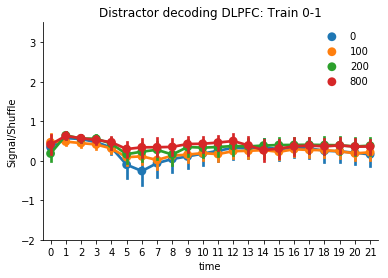

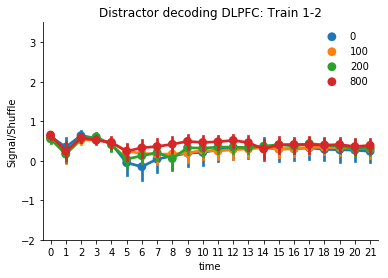

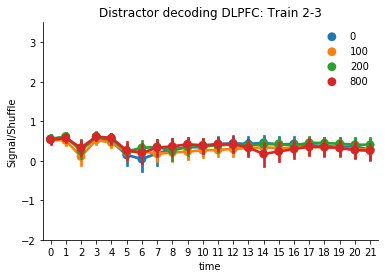

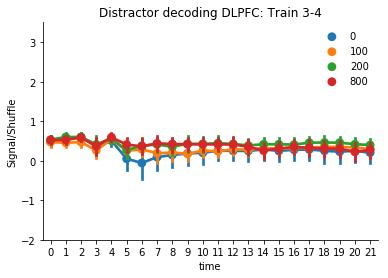

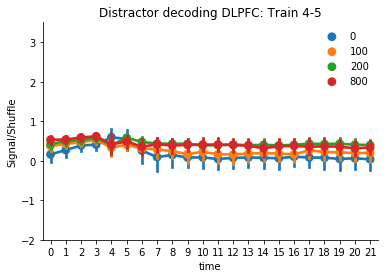

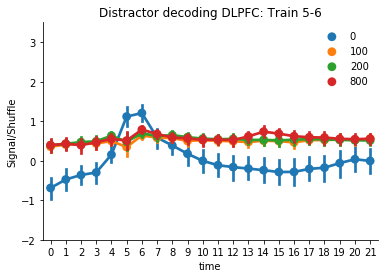

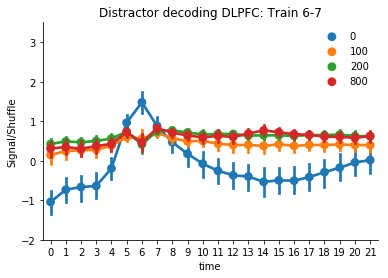

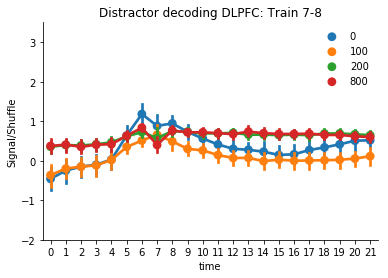

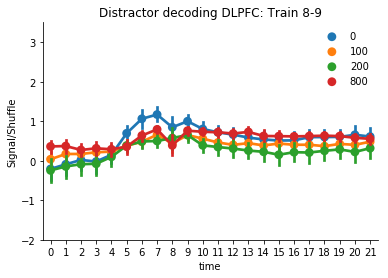

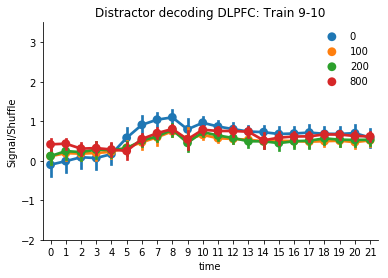

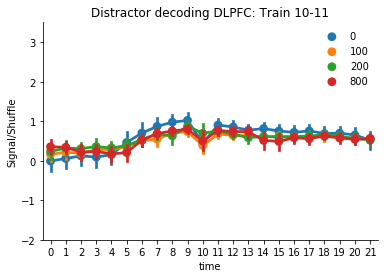

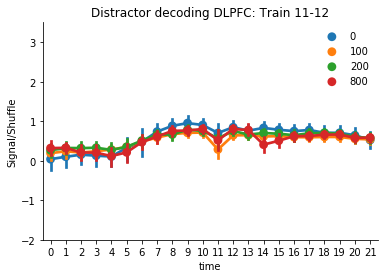

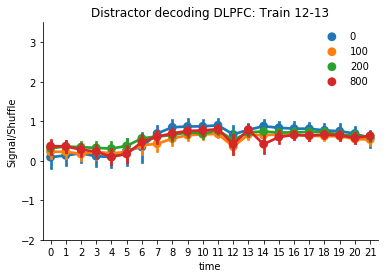

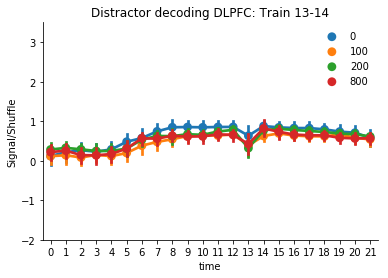

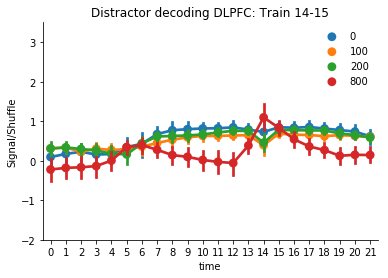

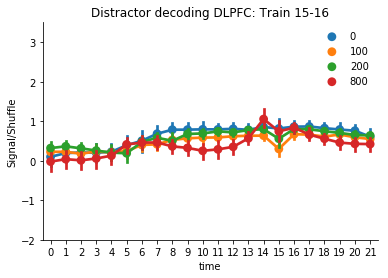

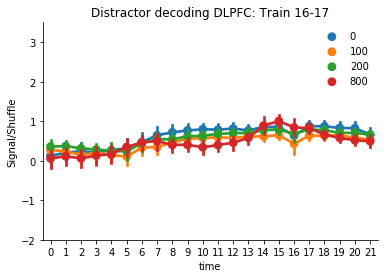

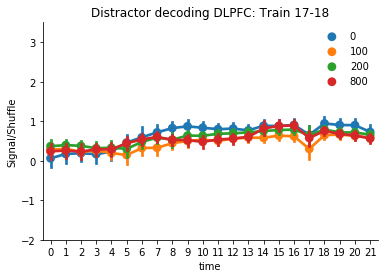

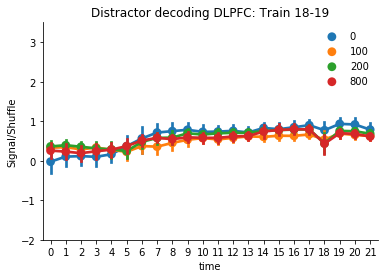

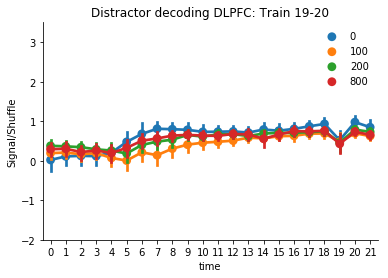

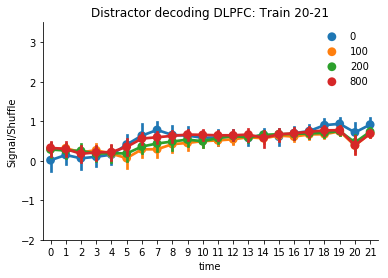

No handles with labels found to put in legend.


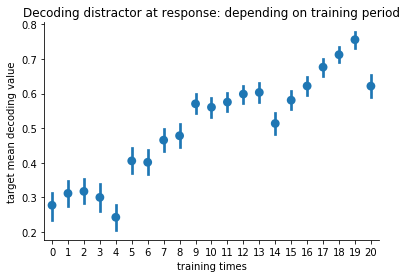

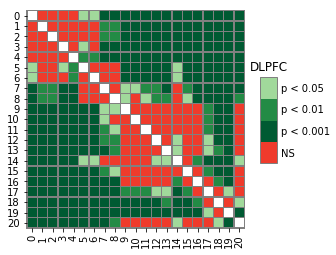

In [122]:

i_t = list(range(0, 21))
f_t = list(range(1, 22))
titles = [str(i_t[i]) for i in range(0, len(i_t))]
frames_fd=[]

#### All times (training in distractor presentation, test on the rest)

for win in range(0,len(i_t)):
    frames_dlpfc=[]

    for idx, cond in enumerate([0,100,200,800]):
        ns={}
        for i in range(i_t[win], f_t[win]):
            ns[str(i)]=pd.DataFrame(cd_DLPFC_d[idx, i, : ]).transpose() 

        N=pd.Panel(ns)
        n=N.mean(axis=0)
        neurons_sh = []
        for neuron in range(0, 63):
            sh_cond_n = conditions_dictionaries_d[4+idx][str(neuron)].mean(axis=0)
            sh_cond_n_std = conditions_dictionaries_d[4+idx][str(neuron)].std(axis=0)
            subst = (np.array(n.iloc[neuron]) - np.array(sh_cond_n))/ np.array(sh_cond_n_std)
            subst = -1*subst 
            neurons_sh.append(subst)

        n = pd.DataFrame(neurons_sh)
        n.columns=[x for x in range(0, 22)]
        n = pd.melt(n)
        n['cond'] = cond
        n['area'] ='DLPFC'
        frames_dlpfc.append(n)

    dlpfc_dist=pd.concat(frames_dlpfc)
    sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
    plt.legend(frameon=False)
    plt.title('Distractor decoding DLPFC: Train ' + str(i_t[win]) + '-' + str(f_t[win]) )
    plt.xlabel('time')
    plt.ylabel('Signal/Shuffle')
    plt.ylim(-2, 3.5)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.show()
    
    #
    f_d = pd.DataFrame(dlpfc_dist.loc[dlpfc_dist['variable']>time_br, 'value'])
    f_d['tr_time'] =  i_t[win]
    f_d
    frames_fd.append(f_d)

    

frames_fd = pd.concat(frames_fd, ignore_index=True)

##Plot
sns.pointplot(x='tr_time', y='value', ci=69, join=False, x_estimator=np.mean, data=frames_fd)
plt.legend(frameon=False)
plt.title('Decoding distractor at response: depending on training period')
plt.xlabel('training times')
plt.ylabel('target mean decoding value')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

pc = sp.posthoc_ttest(frames_fd, val_col='value', group_col='tr_time') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('DLPFC')
plt.show()

### Train Distractor

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


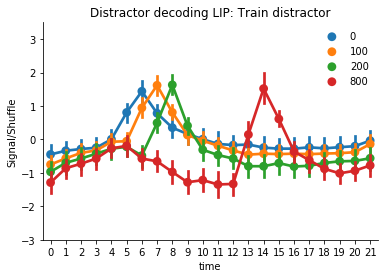

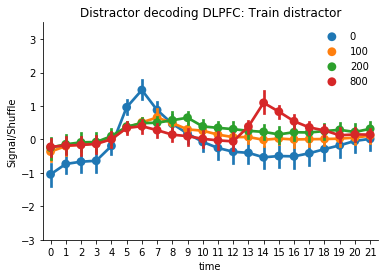

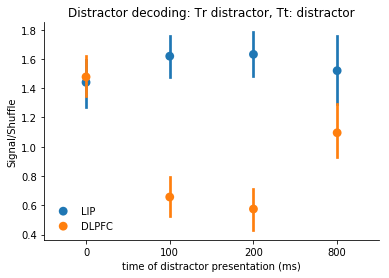

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     8.860
Date:                Fri, 11 Jan 2019   Prob (F-statistic):           1.05e-05
Time:                        18:04:28   Log-Likelihood:                -679.14
No. Observations:                 428   AIC:                             1366.
Df Residuals:                     424   BIC:                             1383.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9432      0.100  

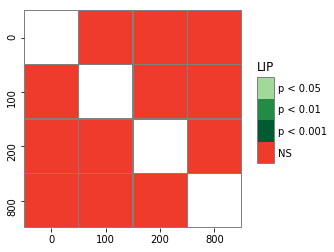

          0         100       200       800
0   -1.000000  0.000030  0.000011  0.087333
100  0.000030 -1.000000  0.666516  0.043436
200  0.000011  0.666516 -1.000000  0.020426
800  0.087333  0.043436  0.020426 -1.000000


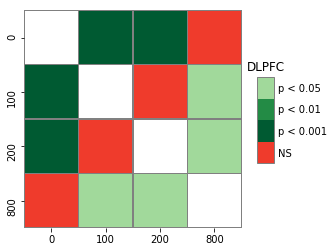

In [128]:
distractor_times=[6,7,8,14]

frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_LIP_d[idx, distractor_times[idx], : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 44):
        sh_cond_n = conditions_dictionaries_d[idx][str(neuron)].mean(axis=0)
        sh_cond_n_std = conditions_dictionaries_d[idx][str(neuron)].std(axis=0)
        subst = (np.array(n.iloc[neuron]) - np.array(sh_cond_n))/ np.array(sh_cond_n_std)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Distractor decoding LIP: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.ylim(-3, 3.5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_DLPFC_d[idx, distractor_times[idx], : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 63):
        sh_cond_n = conditions_dictionaries_d[4+idx][str(neuron)].mean(axis=0)
        sh_cond_n_std = conditions_dictionaries_d[4+idx][str(neuron)].std(axis=0)
        subst = (np.array(n.iloc[neuron]) - np.array(sh_cond_n))/ np.array(sh_cond_n_std)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    n['cond'] = cond
    n['area'] ='DLPFC'
    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Distractor decoding DLPFC: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.ylim(-3, 3.5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#######

cond=[0, 100, 200, 800]
frames=[]
for i in range(0,len(cond)):
    ##LIP
    int_values_lip = lip_dist.loc[(lip_dist['variable'] == distractor_times[i]) & (lip_dist['cond'] == cond[i])]
    frames.append(int_values_lip)
    ##DLPFC
    int_values_dlpfc = dlpfc_dist.loc[(dlpfc_dist['variable'] == distractor_times[i]) & (dlpfc_dist['cond'] == cond[i])]
    frames.append(int_values_dlpfc)


decoding = pd.concat(frames, ignore_index=True)


##Plot
sns.pointplot(x='cond', y='value', hue='area', ci=69, join=False, x_estimator=np.mean, data=decoding)
plt.legend(frameon=False)
plt.title('Distractor decoding: Tr distractor, Tt: distractor')
plt.xlabel('time of distractor presentation (ms)')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


model = smf.ols(formula="value ~  cond*area", data=decoding).fit()
print(model.summary())

####### Multiple comparisons
pc = sp.posthoc_ttest(decoding.loc[decoding['area']=='LIP'], val_col='value', group_col='cond') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('LIP')
plt.show()

pc = sp.posthoc_ttest(decoding.loc[decoding['area']=='DLPFC'], val_col='value', group_col='cond') 
print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('DLPFC')
plt.show()
